<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/05-kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Algoritmo k-Nearest Neighbors
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Tomas Hidrobo &bull; 2026-01
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de clasificación k-Nearest Neighbors (kNN) para predecir la clase de un conjunto de datos y también para predecir valores numéricos.

Los paquetes necesarios son:

In [60]:
import io
from google.colab import files

import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización
import numpy as np

from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.datasets import make_blobs # Dataset
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay  # Métrica de evaluación

# Algoritmo k-NN
# Clasificacion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
# Regresion
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [49]:
uploaded = files.upload()
filename = next(iter(uploaded))
df_raw = pd.read_csv(io.BytesIO(uploaded[filename]))

print("Archivo:", filename)
df = df_raw.copy()

print("Archivo cargado:", filename)
print("Dimensiones (filas, columnas):", df.shape)

print("\nPrimeras 10 filas:")
display(df.head(10))

print("\nDescripción (variables numéricas)")
display(df.describe().T)

print("\nDescripción (variables categóricas)")
display(df.describe(include="object").T)


Saving premier_league_cleaned.csv to premier_league_cleaned (7).csv
Archivo: premier_league_cleaned (7).csv
Archivo cargado: premier_league_cleaned (7).csv
Dimensiones (filas, columnas): (1049, 15)

Primeras 10 filas:


,Matchday,Date,Time,Home Team,homeScore,homeXG,awayScore,awayXG,Away Team,Attendance,Referee,Stadium,Result,*Additional Stats,Attendance_cap
0,1,2022-08-05,20:00:00,Crystal Palace,0,1.2,2,1.0,Arsenal,25286.0,Anthony Taylor,Selhurst Park,A,https://fbref.com//en/matches/e62f6e78/Crystal...,25286.0
1,1,2022-08-06,12:30:00,Fulham,2,1.2,2,1.2,Liverpool,22207.0,Andy Madley,Craven Cottage,D,https://fbref.com//en/matches/6713c1dc/Fulham-...,22508.5
2,1,2022-08-06,15:00:00,Tottenham,4,1.5,1,0.5,Southampton,61732.0,Andre Marriner,Tottenham Hotspur Stadium,H,https://fbref.com//en/matches/09d8a999/Tottenh...,61732.0
3,1,2022-08-06,15:00:00,Newcastle Utd,2,1.7,0,0.3,Nott'ham Forest,52245.0,Simon Hooper,St James' Park,H,https://fbref.com//en/matches/1ac96eb4/Newcast...,52245.0
4,1,2022-08-06,15:00:00,Leeds United,2,0.8,1,1.3,Wolves,36347.0,Robert Jones,Elland Road,H,https://fbref.com//en/matches/82702941/Leeds-U...,36347.0
5,1,2022-08-06,15:00:00,Bournemouth,2,0.6,0,0.7,Aston Villa,11013.0,Peter Bankes,Vitality Stadium,H,https://fbref.com//en/matches/877e3193/Bournem...,11013.0
6,1,2022-08-06,17:30:00,Everton,0,0.7,1,1.5,Chelsea,39254.0,Craig Pawson,Goodison Park,A,https://fbref.com//en/matches/3a917cee/Everton...,39254.0
7,1,2022-08-07,14:00:00,Leicester City,2,0.6,2,0.8,Brentford,31794.0,Jarred Gillett,King Power Stadium,D,https://fbref.com//en/matches/3249ba27/Leicest...,31794.0
8,1,2022-08-07,14:00:00,Manchester Utd,1,1.4,2,1.5,Brighton,73711.0,Paul Tierney,Old Trafford,A,https://fbref.com//en/matches/8251694e/Manches...,73711.0
9,1,2022-08-07,16:30:00,West Ham,0,0.5,2,2.2,Manchester City,62443.0,Michael Oliver,London Stadium,A,https://fbref.com//en/matches/ece62baf/West-Ha...,62443.0



Descripción (variables numéricas)


,count,mean,std,min,25%,50%,75%,max
Matchday,1049.0,18.246902,10.512853,1.0,9.0,18.0,27.0,38.0
homeScore,1049.0,1.660629,1.364484,0.0,1.0,1.0,2.0,9.0
homeXG,1049.0,1.626787,0.878962,0.0,1.0,1.5,2.2,7.0
awayScore,1049.0,1.383222,1.237897,0.0,0.0,1.0,2.0,8.0
awayXG,1049.0,1.316206,0.781492,0.0,0.8,1.2,1.7,5.6
Attendance,1049.0,39713.988084,17042.474631,9972.0,28997.0,38198.0,53306.0,75546.0
Attendance_cap,1049.0,39687.196735,17035.829814,9972.0,29116.0,36955.0,53306.0,74081.5



Descripción (variables categóricas)


,count,unique,top,freq
Date,1049,317,2024-05-19,10
Time,1049,21,15:00:00,384
Home Team,1049,24,Crystal Palace,53
Away Team,1049,24,Arsenal,53
Referee,1049,29,Anthony Taylor,82
Stadium,1049,27,Selhurst Park,53
Result,1049,3,H,473
*Additional Stats,1049,1049,https://fbref.com//en/matches/7bab156e/Leicest...,1


In [50]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

df["Hour"] = df["Time"].astype(str).str.slice(0, 2).astype(int)

df = df.dropna(subset=["Date", "Hour"]).copy()

df["Month"] = df["Date"].dt.month
df["DayOfWeek"] = df["Date"].dt.dayofweek

total_goals = df["homeScore"] + df["awayScore"]
y = (total_goals >= 3).astype(int)

X_base = df[["Matchday", "Month", "DayOfWeek", "Hour", "Home Team", "Away Team"]].copy()
X = pd.get_dummies(X_base, columns=["Home Team", "Away Team"], drop_first=False)

bool_cols = X.select_dtypes(include=["bool"]).columns
X[bool_cols] = X[bool_cols].astype(int)

print("df final shape:", df.shape)
print("X shape:", X.shape)
print("Distribución y:", y.value_counts().to_dict())
display(X.head(10))

df final shape: (1049, 18)
X shape: (1049, 52)
Distribución y: {1: 615, 0: 434}


,Matchday,Month,DayOfWeek,Hour,Home Team_Arsenal,Home Team_Aston Villa,Home Team_Bournemouth,Home Team_Brentford,Home Team_Brighton,Home Team_Burnley,...,Away Team_Luton Town,Away Team_Manchester City,Away Team_Manchester Utd,Away Team_Newcastle Utd,Away Team_Nott'ham Forest,Away Team_Sheffield Utd,Away Team_Southampton,Away Team_Tottenham,Away Team_West Ham,Away Team_Wolves
0,1,8,4,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,8,5,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,8,5,15,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,8,5,15,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,8,5,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,8,5,15,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,8,5,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,8,6,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,8,6,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,8,6,16,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0



### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


In [51]:
# Separamos el modelo en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y.values, test_size=0.2, random_state=99, stratify=y.values
)

# Escalado
num_cols = ["Matchday", "Month", "DayOfWeek", "Hour"]
scaler = StandardScaler()

X_train_s = X_train.copy()
X_test_s  = X_test.copy()

X_train_s[num_cols] = scaler.fit_transform(X_train_s[num_cols])
X_test_s[num_cols]  = scaler.transform(X_test_s[num_cols])

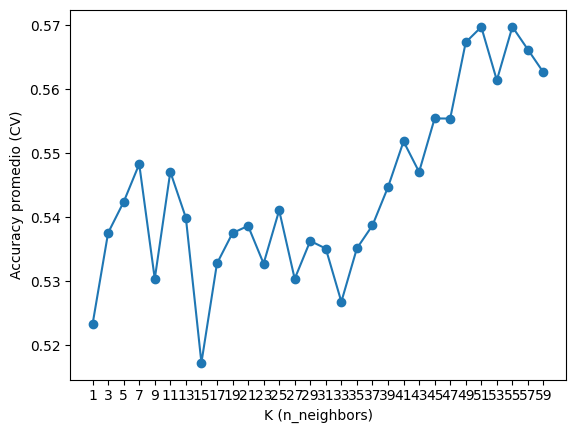

In [52]:
k_values = range(1, 61, 2)  # El 2 es para que salgan numeros impares en x
cv = KFold(n_splits=5, shuffle=True, random_state=99)

acc_scores = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        model, X_train_s, y_train,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1
    )
    acc_scores.append(scores.mean())

plt.figure()
plt.plot(list(k_values), acc_scores, marker="o")
plt.xlabel("K (n_neighbors)")
plt.ylabel("Accuracy promedio (CV)")
plt.xticks(list(k_values))
plt.show()

Viendo el grafico, se puede observar como en la variable 49 se encuentra el pico mas alto. Ya que despues de  comienza a bajar notablemente la linea o vuelve al pico en 55 pero innecesario dado que ya esta en 49.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

k usado: 49
Accuracy (test): 0.5905

Reporte de clasificación:
              precision    recall  f1-score   support

Under2.5 (0)       0.52      0.16      0.25        87
 Over2.5 (1)       0.60      0.89      0.72       123

    accuracy                           0.59       210
   macro avg       0.56      0.53      0.48       210
weighted avg       0.57      0.59      0.52       210



<Figure size 640x480 with 0 Axes>

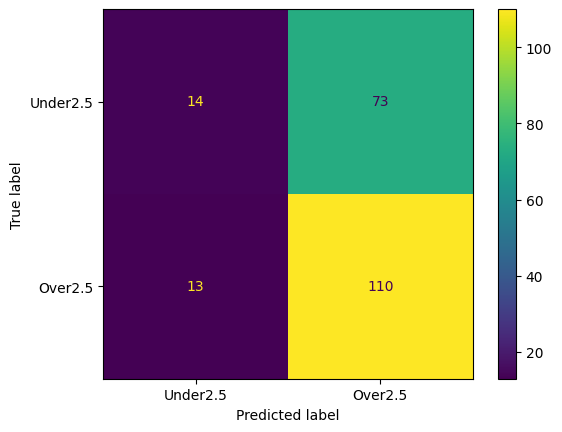

In [53]:
k_opt = 49

# Entrenamos el modelo con el k optimo
knn = KNeighborsClassifier(n_neighbors=k_opt)
knn.fit(X_train_s, y_train)

y_pred = knn.predict(X_test_s)

print(f"k usado: {k_opt}")
print("Accuracy (test):", round(accuracy_score(y_test, y_pred), 4))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=["Under2.5 (0)", "Over2.5 (1)"]))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Under2.5", "Over2.5"])

plt.figure()
disp.plot()
plt.show()


---
## <font color='264CC7'> Regresión </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [56]:
uploaded = files.upload()
filename = next(iter(uploaded))
df_raw = pd.read_csv(io.BytesIO(uploaded[filename]))

print("Archivo:", filename)
df = df_raw.copy()

print("Archivo cargado:", filename)
print("Dimensiones (filas, columnas):", df.shape)

print("\nPrimeras 10 filas:")
display(df.head(10))

print("\nDescripción (variables numéricas)")
display(df.describe().T)

print("\nDescripción (variables categóricas)")
display(df.describe(include="object").T)

Saving premier_league_cleaned.csv to premier_league_cleaned (9).csv
Archivo: premier_league_cleaned (9).csv
Archivo cargado: premier_league_cleaned (9).csv
Dimensiones (filas, columnas): (1049, 15)

Primeras 10 filas:


,Matchday,Date,Time,Home Team,homeScore,homeXG,awayScore,awayXG,Away Team,Attendance,Referee,Stadium,Result,*Additional Stats,Attendance_cap
0,1,2022-08-05,20:00:00,Crystal Palace,0,1.2,2,1.0,Arsenal,25286.0,Anthony Taylor,Selhurst Park,A,https://fbref.com//en/matches/e62f6e78/Crystal...,25286.0
1,1,2022-08-06,12:30:00,Fulham,2,1.2,2,1.2,Liverpool,22207.0,Andy Madley,Craven Cottage,D,https://fbref.com//en/matches/6713c1dc/Fulham-...,22508.5
2,1,2022-08-06,15:00:00,Tottenham,4,1.5,1,0.5,Southampton,61732.0,Andre Marriner,Tottenham Hotspur Stadium,H,https://fbref.com//en/matches/09d8a999/Tottenh...,61732.0
3,1,2022-08-06,15:00:00,Newcastle Utd,2,1.7,0,0.3,Nott'ham Forest,52245.0,Simon Hooper,St James' Park,H,https://fbref.com//en/matches/1ac96eb4/Newcast...,52245.0
4,1,2022-08-06,15:00:00,Leeds United,2,0.8,1,1.3,Wolves,36347.0,Robert Jones,Elland Road,H,https://fbref.com//en/matches/82702941/Leeds-U...,36347.0
5,1,2022-08-06,15:00:00,Bournemouth,2,0.6,0,0.7,Aston Villa,11013.0,Peter Bankes,Vitality Stadium,H,https://fbref.com//en/matches/877e3193/Bournem...,11013.0
6,1,2022-08-06,17:30:00,Everton,0,0.7,1,1.5,Chelsea,39254.0,Craig Pawson,Goodison Park,A,https://fbref.com//en/matches/3a917cee/Everton...,39254.0
7,1,2022-08-07,14:00:00,Leicester City,2,0.6,2,0.8,Brentford,31794.0,Jarred Gillett,King Power Stadium,D,https://fbref.com//en/matches/3249ba27/Leicest...,31794.0
8,1,2022-08-07,14:00:00,Manchester Utd,1,1.4,2,1.5,Brighton,73711.0,Paul Tierney,Old Trafford,A,https://fbref.com//en/matches/8251694e/Manches...,73711.0
9,1,2022-08-07,16:30:00,West Ham,0,0.5,2,2.2,Manchester City,62443.0,Michael Oliver,London Stadium,A,https://fbref.com//en/matches/ece62baf/West-Ha...,62443.0



Descripción (variables numéricas)


,count,mean,std,min,25%,50%,75%,max
Matchday,1049.0,18.246902,10.512853,1.0,9.0,18.0,27.0,38.0
homeScore,1049.0,1.660629,1.364484,0.0,1.0,1.0,2.0,9.0
homeXG,1049.0,1.626787,0.878962,0.0,1.0,1.5,2.2,7.0
awayScore,1049.0,1.383222,1.237897,0.0,0.0,1.0,2.0,8.0
awayXG,1049.0,1.316206,0.781492,0.0,0.8,1.2,1.7,5.6
Attendance,1049.0,39713.988084,17042.474631,9972.0,28997.0,38198.0,53306.0,75546.0
Attendance_cap,1049.0,39687.196735,17035.829814,9972.0,29116.0,36955.0,53306.0,74081.5



Descripción (variables categóricas)


,count,unique,top,freq
Date,1049,317,2024-05-19,10
Time,1049,21,15:00:00,384
Home Team,1049,24,Crystal Palace,53
Away Team,1049,24,Arsenal,53
Referee,1049,29,Anthony Taylor,82
Stadium,1049,27,Selhurst Park,53
Result,1049,3,H,473
*Additional Stats,1049,1049,https://fbref.com//en/matches/7bab156e/Leicest...,1


In [57]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Hour"] = df["Time"].astype(str).str.slice(0, 2).astype(int)

df = df.dropna(subset=["Date", "Hour", "Attendance_cap"]).copy()

df["Month"] = df["Date"].dt.month
df["DayOfWeek"] = df["Date"].dt.dayofweek

y = df["Attendance_cap"].astype(float)

X_base = df[["Matchday", "Month", "DayOfWeek", "Hour", "Home Team", "Away Team"]].copy()
X = pd.get_dummies(X_base, columns=["Home Team", "Away Team"], drop_first=False)

bool_cols = X.select_dtypes(include=["bool"]).columns
X[bool_cols] = X[bool_cols].astype(int)

print("df final shape:", df.shape)
print("X shape:", X.shape)
print("y (regresión) describe:")
display(y.describe())
display(X.head(10))

df final shape: (1049, 18)
X shape: (1049, 52)
y (regresión) describe:


,Attendance_cap
count,1049.000000
mean,39687.196735
std,17035.829814
min,9972.000000
25%,29116.000000
50%,36955.000000
75%,53306.000000
max,74081.500000


,Matchday,Month,DayOfWeek,Hour,Home Team_Arsenal,Home Team_Aston Villa,Home Team_Bournemouth,Home Team_Brentford,Home Team_Brighton,Home Team_Burnley,...,Away Team_Luton Town,Away Team_Manchester City,Away Team_Manchester Utd,Away Team_Newcastle Utd,Away Team_Nott'ham Forest,Away Team_Sheffield Utd,Away Team_Southampton,Away Team_Tottenham,Away Team_West Ham,Away Team_Wolves
0,1,8,4,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,8,5,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,8,5,15,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,8,5,15,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,8,5,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,8,5,15,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,8,5,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,8,6,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,8,6,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,8,6,16,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0



### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


In [58]:
# Entrenamos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y.values, test_size=0.2, random_state=99
)

# Escalado
num_cols = ["Matchday", "Month", "DayOfWeek", "Hour"]
scaler = StandardScaler()

X_train_s = X_train.copy()
X_test_s  = X_test.copy()

X_train_s[num_cols] = scaler.fit_transform(X_train_s[num_cols])
X_test_s[num_cols]  = scaler.transform(X_test_s[num_cols])

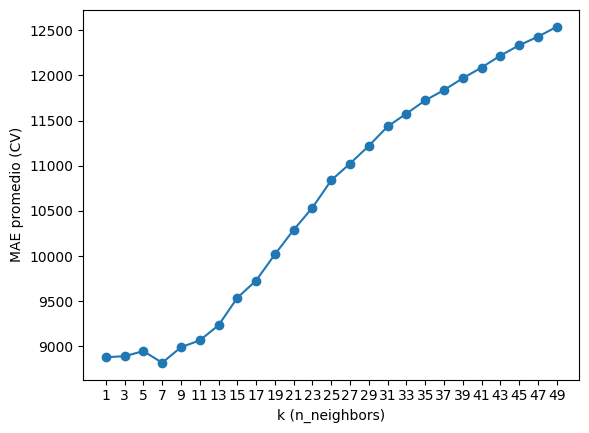

In [59]:
k_values = range(1, 51, 2)
cv = KFold(n_splits=5, shuffle=True, random_state=99)

mae_scores = []
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(
        model, X_train_s, y_train,
        cv=cv,
        scoring="neg_mean_absolute_error",
        n_jobs=-1
    )
    mae_scores.append(-scores.mean())

plt.figure()
plt.plot(list(k_values), mae_scores, marker="o")
plt.xlabel("k (n_neighbors)")
plt.ylabel("MAE promedio (CV)")
plt.xticks(list(k_values))
plt.show()

Para regresion tenemos que encontrar el punto minimo de la grafica, en este caso siendo 7, ya que despues de eso solo aumenta.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Calcula el error cuadrático medio.</li>
</ul>
</div>

In [62]:
# Entrenar
knn_reg = KNeighborsRegressor(n_neighbors=k_opt)
knn_reg.fit(X_train_s, y_train)

# Predecir
y_pred = knn_reg.predict(X_test_s)

# MSE y RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"k usado: {k_opt}")
print("MSE (test):", round(mse, 4))
print("RMSE (test):", round(rmse, 4))

k usado: 7
MSE (test): 115356609.6885
RMSE (test): 10740.4194
